<a href="https://colab.research.google.com/github/PedroMesquitaIsidoro/ArvoreDeDecisao-IA/blob/main/Questao1/Analise_de_risco_ID3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd # para trabalhar com a planilha
import numpy as np # para calculos 
base_risco_credito = pd.read_csv('RiscoDeCredito.csv')
base_risco_credito

,Historia de Credito,Divida,Garantia,Renda,Risco
0,Ruim,Alta,Nenhuma,0_15,Alto
1,Desconhecida,Alta,Nenhuma,15_35,Alto
2,Desconhecida,Baixa,Nenhuma,15_35,Moderado
3,Desconhecida,Baixa,Nenhuma,acima_35,Alto
4,Desconhecida,Baixa,Nenhuma,acima_35,Baixo
5,Desconhecida,Baixa,Adequada,acima_35,Baixo
6,Ruim,Baixa,Nenhuma,0_15,Alto
7,Ruim,Baixa,Adequada,acima_35,Moderado
8,Boa,Baixa,Nenhuma,acima_35,Baixo
9,Boa,Alta,Adequada,acima_35,Baixo


In [5]:
#Pre-processamento dos dados
x_risco_credito = base_risco_credito.iloc[:, 0:4].values
x_risco_credito #mostra todos os atributos com excessao da clase

array([['Ruim', 'Alta', 'Nenhuma', '0_15'],
       ['Desconhecida', 'Alta', 'Nenhuma', '15_35'],
       ['Desconhecida', 'Baixa', 'Nenhuma', '15_35'],
       ['Desconhecida', 'Baixa', 'Nenhuma', 'acima_35'],
       ['Desconhecida', 'Baixa', 'Nenhuma', 'acima_35'],
       ['Desconhecida', 'Baixa', 'Adequada', 'acima_35'],
       ['Ruim', 'Baixa', 'Nenhuma', '0_15'],
       ['Ruim', 'Baixa', 'Adequada', 'acima_35'],
       ['Boa', 'Baixa', 'Nenhuma', 'acima_35'],
       ['Boa', 'Alta', 'Adequada', 'acima_35'],
       ['Boa', 'Alta', 'Nenhuma', '0_15'],
       ['Boa', 'Alta', 'Nenhuma', '15_35'],
       ['Boa', 'Alta', 'Nenhuma', 'acima_35'],
       ['Ruim', 'Alta', 'Nenhuma', '15_35']], dtype=object)

In [7]:
#Pre-processamento dos dados
y_risco_credito = base_risco_credito.iloc[:, 4].values
y_risco_credito #mostrar classe

array(['Alto', 'Alto', 'Moderado', 'Alto', 'Baixo', 'Baixo', 'Alto',
       'Moderado', 'Baixo', 'Baixo', 'Alto', 'Moderado', 'Baixo', 'Alto'],
      dtype=object)

In [8]:
#Pre-processamento dos dados
from sklearn.preprocessing import LabelEncoder
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [9]:
#Pre-processamento dos dados
x_risco_credito[:, 0] = label_encoder_historia.fit_transform(x_risco_credito[:, 0])
x_risco_credito[:, 1] = label_encoder_divida.fit_transform(x_risco_credito[:, 1])
x_risco_credito[:, 2] = label_encoder_garantia.fit_transform(x_risco_credito[:, 2])
x_risco_credito[:, 3] = label_encoder_renda.fit_transform(x_risco_credito[:, 3])

In [10]:
#Pre-processamento dos dados
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [13]:
# salvando os dados pre-processados
import pickle
with open('risco_credito.pkl', 'wb') as f:
  pickle.dump([x_risco_credito, y_risco_credito], f) 

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
import pickle
with open('risco_credito.pkl', 'rb') as f:  # abrindo o arquivo já pre-processado
  x_risco_credito, y_risco_credito = pickle.load(f)



In [18]:
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [19]:
y_risco_credito

array(['Alto', 'Alto', 'Moderado', 'Alto', 'Baixo', 'Baixo', 'Alto',
       'Moderado', 'Baixo', 'Baixo', 'Alto', 'Moderado', 'Baixo', 'Alto'],
      dtype=object)

In [21]:
#Criando a arvore de decisao com o criterio da entropia
arvore_risco_credito = DecisionTreeClassifier(criterion= 'entropy')
arvore_risco_credito.fit(x_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [23]:
#Aqui eh realizado o calculo dos atributos com maiores ganho de informacao
#Perceba que o que apresenta maior ganho de informacao eh o que esta mais a direita, localizado na ultima posicao
#do array. No caso a renda e o atributo com maior ganho de informacao.
#Ranking dos maiores ganhos
# 1 -> Renda = 0.48098917
# 2 -> Hisoria de credito = 0.41607015
# 3 -> Divida = 0.06408636
# 4 -> Garantia = 0.06408636
#Sendo assim, a renda sera a raiz da nossa arvore
arvore_risco_credito.feature_importances_

array([0.41607015, 0.06408636, 0.03885431, 0.48098917])

In [28]:
arvore_risco_credito.classes_

array(['Alto', 'Baixo', 'Moderado'], dtype=object)

[Text(0.6363636363636364, 0.9166666666666666, 'renda <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]\nclass = Alto'),
 Text(0.45454545454545453, 0.75, 'historia de credito <= 1.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]\nclass = Alto'),
 Text(0.36363636363636365, 0.5833333333333334, 'divida <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 0, 2]\nclass = Alto'),
 Text(0.2727272727272727, 0.4166666666666667, 'historia de credito <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 0, 1]\nclass = Alto'),
 Text(0.18181818181818182, 0.25, 'renda <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 0, 1]\nclass = Alto'),
 Text(0.09090909090909091, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = Alto'),
 Text(0.2727272727272727, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Moderado'),
 Text(0.36363636363636365, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = Alto'),
 Text(0.45454545454545453, 0.4166666666666667

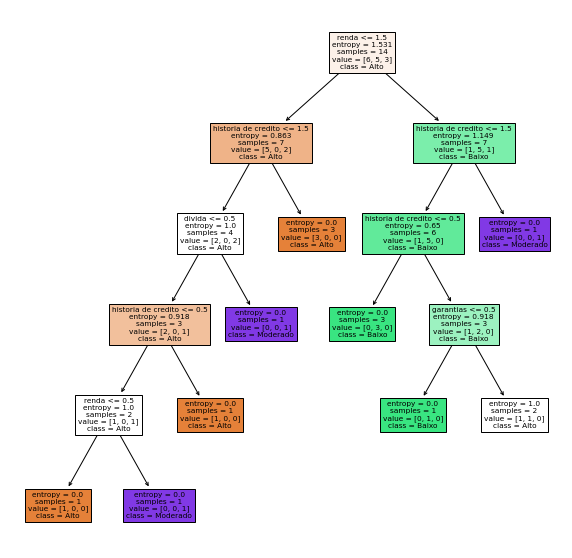

In [31]:
from sklearn import tree
import matplotlib.pyplot as plt

previsores = ['historia de credito', 'divida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows = 1, ncols =1, figsize=(10,10))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names = arvore_risco_credito.classes_, filled= True)

In [33]:
#Entradas em numeros para as instancias:
#Pra Historia de credito
# 0 ->  Boa
# 1 ->  Desconhecida
# 2 ->  Ruim


#Pra Divida
# 0 ->  Alta
# 1 ->  Baixa

#Pra Garantia
# 0 ->  Adequada
# 1 ->  Nenhuma


#Pra Renda
# 0 ->  entre 0 e 15
# 1 ->  entre 15 e 35
# 2 -> acima de 35



#exemplo para [boa, baixa, nenhuma, entre 0 e 15]
previsores= arvore_risco_credito.predict([[0,1,1, 0]])
previsores

array(['Moderado'], dtype=object)